<a href="https://colab.research.google.com/github/mrunallll/news-posts-views-analysis/blob/main/data_viz1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('#2 Data for assignment - Sheet1.csv')
print("Shape: ", data.shape)
data.head()

Shape:  (49, 3)


,Postid,Hours since creation,# users viewed this post
0,P1,0,46
1,P1,1,13
2,P1,2,66
3,P1,3,64
4,P1,4,63


In [ ]:
#Dropping redundant rows
data.drop([27, 41], inplace=True)
data.shape

(47, 3)

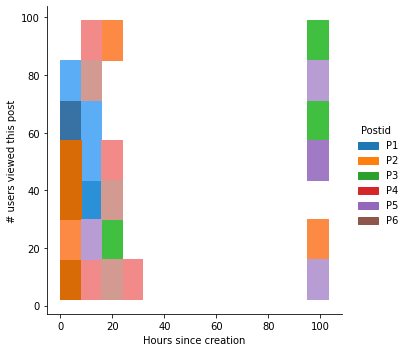

In [ ]:
sns.displot(data = data, x='Hours since creation', y= '# users viewed this post', hue='Postid ')

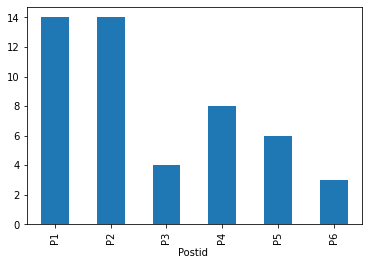

In [ ]:
data.groupby(['Postid ']).size().plot(kind = "bar")

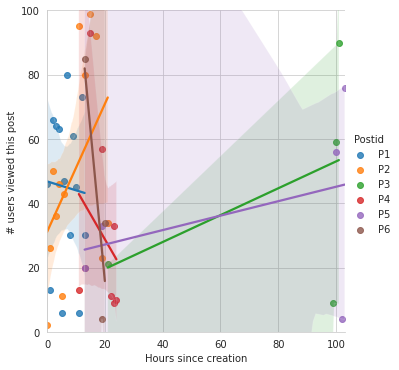

In [85]:
sns.set_style('whitegrid')
sns.lmplot(x ='Hours since creation', y ='# users viewed this post', data = data, 
           hue ='Postid ')
plt.ylim(0,100)
plt.show()

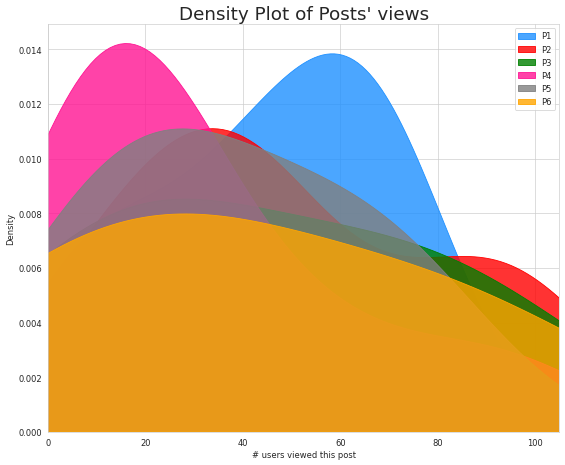

In [ ]:
# Draw Plot
plt.figure(figsize=(11, 9), dpi= 60)
sns.kdeplot(data.loc[data['Postid '] == 'P1', '# users viewed this post'], color="dodgerblue", shade=True, label="P1", alpha=0.8)
sns.kdeplot(data.loc[data['Postid '] == 'P2', '# users viewed this post'], color="red", label="P2",  shade=True, alpha=0.8)
sns.kdeplot(data.loc[data['Postid '] == 'P3', '# users viewed this post'], color="g", label="P3", shade=True, alpha=0.8)
sns.kdeplot(data.loc[data['Postid '] == 'P4', '# users viewed this post'], color="deeppink", label="P4", shade=True, alpha=0.8)
sns.kdeplot(data.loc[data['Postid '] == 'P5', '# users viewed this post'], color="gray", label="P5", shade=True, alpha=0.8)
sns.kdeplot(data.loc[data['Postid '] == 'P6', '# users viewed this post'], color="orange", label="P6", shade=True, alpha=0.8)

plt.xlim(0, 105)

# Decoration
plt.title("Density Plot of Posts' views", fontsize=22)
plt.legend()
plt.show()

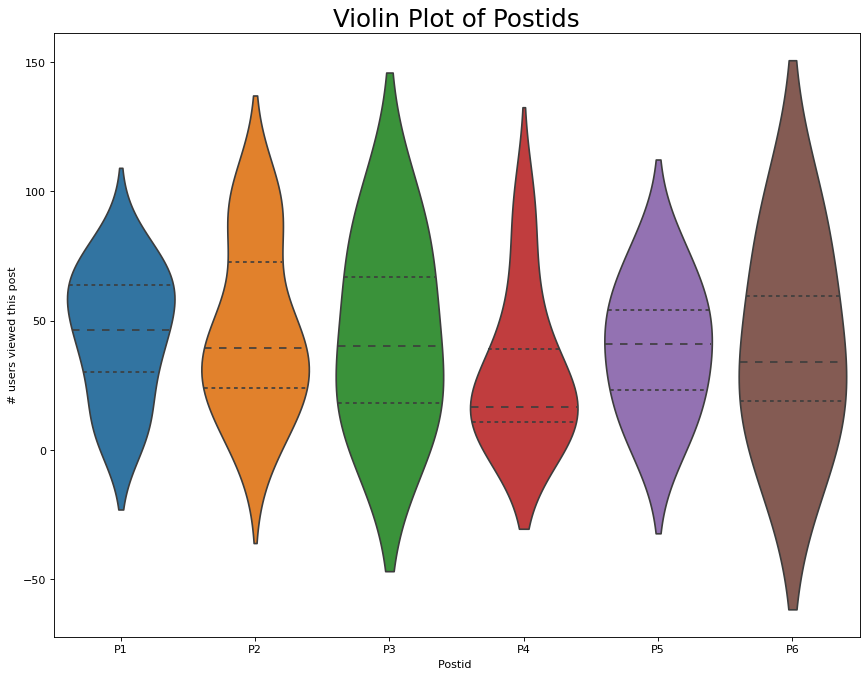

In [ ]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='Postid ', y='# users viewed this post', data=data, scale='width', inner='quartile')
#plt.ylim(0, 200)
# Decoration
plt.title('Violin Plot of Postids', fontsize=22)
plt.show()

#Converting into Pivot Table

In [ ]:
df_pivot = pd.pivot_table(
    data, 
    values="# users viewed this post",
    index="Hours since creation",
    columns="Postid ", 
    aggfunc=np.mean
)

df_pivot=pd.DataFrame(df_pivot)
#df_pivot.columns

In [ ]:
df_pivot.fillna(0)
df=df_pivot.cumsum()
df.plot()

#An Interactive Dashboard using Pywedge

In [ ]:
#!pip install pywedge
import pywedge as pw

mc=pw.Pywedge_Charts(data, c=None, y='Hours since creation')
charts=mc.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

#Creating a more sensible dataset & imputing missing values by predicted values using Random Forest Regression

In [ ]:
data_clean=pd.read_excel('final_clean.xlsx')
data_clean.head(5)

,Hours since creation,P1,P2,P3,P4,P5,P6
0,0,46,2,9,19,56,26
1,1,13,26,59,32,49,35
2,2,66,50,90,68,4,55
3,3,64,36,63,54,76,58
4,4,63,46,57,55,44,53


In [ ]:
data_clean.drop(columns=['Hours since creation'], inplace=True)

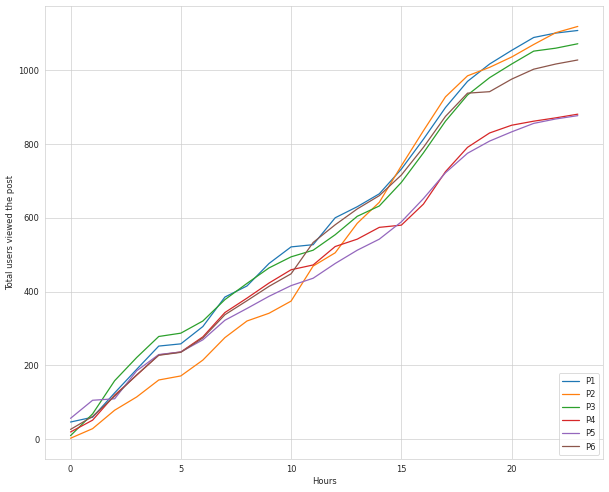

In [96]:
plt.figure(figsize=(12,10), dpi= 60)
plt.plot(data_clean.cumsum())
plt.xlabel('Hours')
plt.ylabel('Total users viewed the post')
plt.legend(['P1','P2','P3', 'P4', 'P5', 'P6'], loc ="lower right")
plt.show()

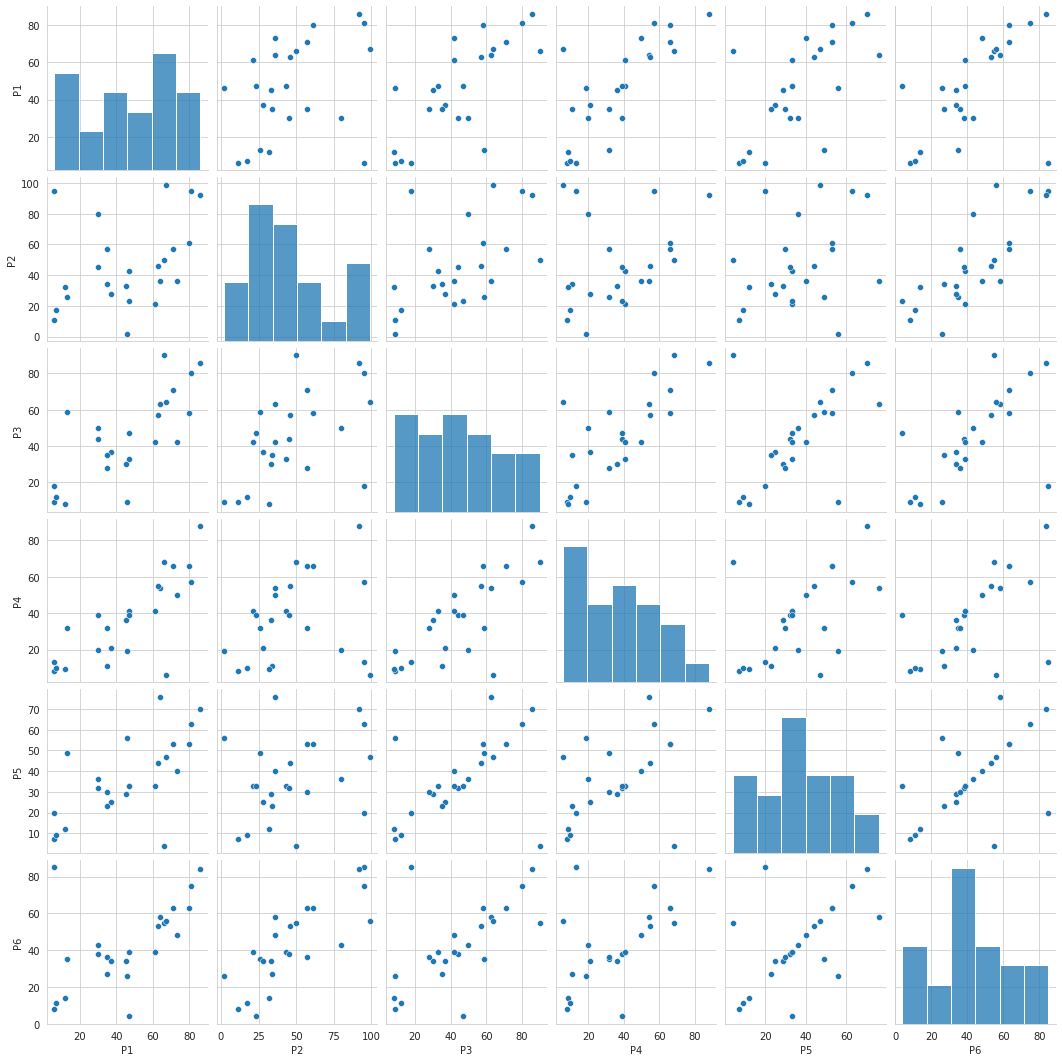

In [86]:
sns.pairplot(data_clean)

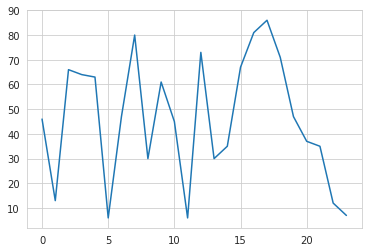

In [97]:
plt.plot(data_clean['P1'])

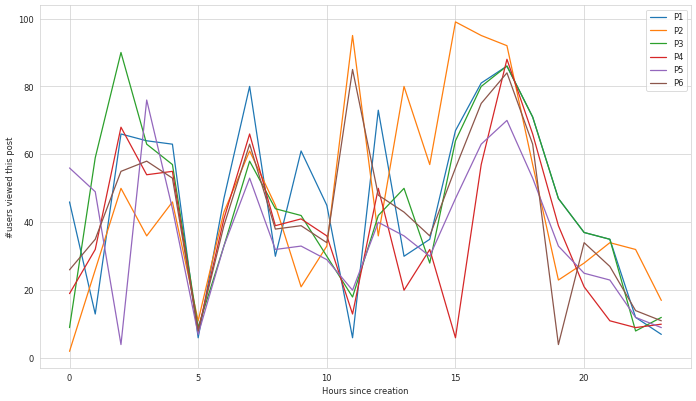

In [105]:
plt.figure(figsize=(14,8), dpi= 60)

plt.plot(data_clean['P1'])
plt.plot(data_clean['P2'])
plt.plot(data_clean['P3'])
plt.plot(data_clean['P4'])
plt.plot(data_clean['P5'])
plt.plot(data_clean['P6'])
plt.xlabel('Hours since creation')
plt.ylabel('#users viewed this post')
plt.legend(['P1','P2','P3', 'P4', 'P5', 'P6'])
plt.show()

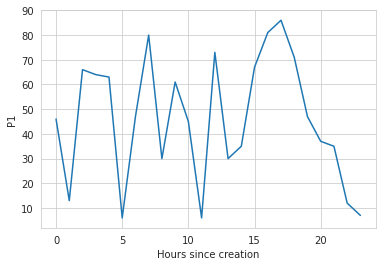

In [104]:
sns.lineplot(
    data=clean_data, x="Hours since creation", y="P1", err_style="bars")